<a href="https://colab.research.google.com/github/s11khushboo/G1-Project/blob/main/Copy_of_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

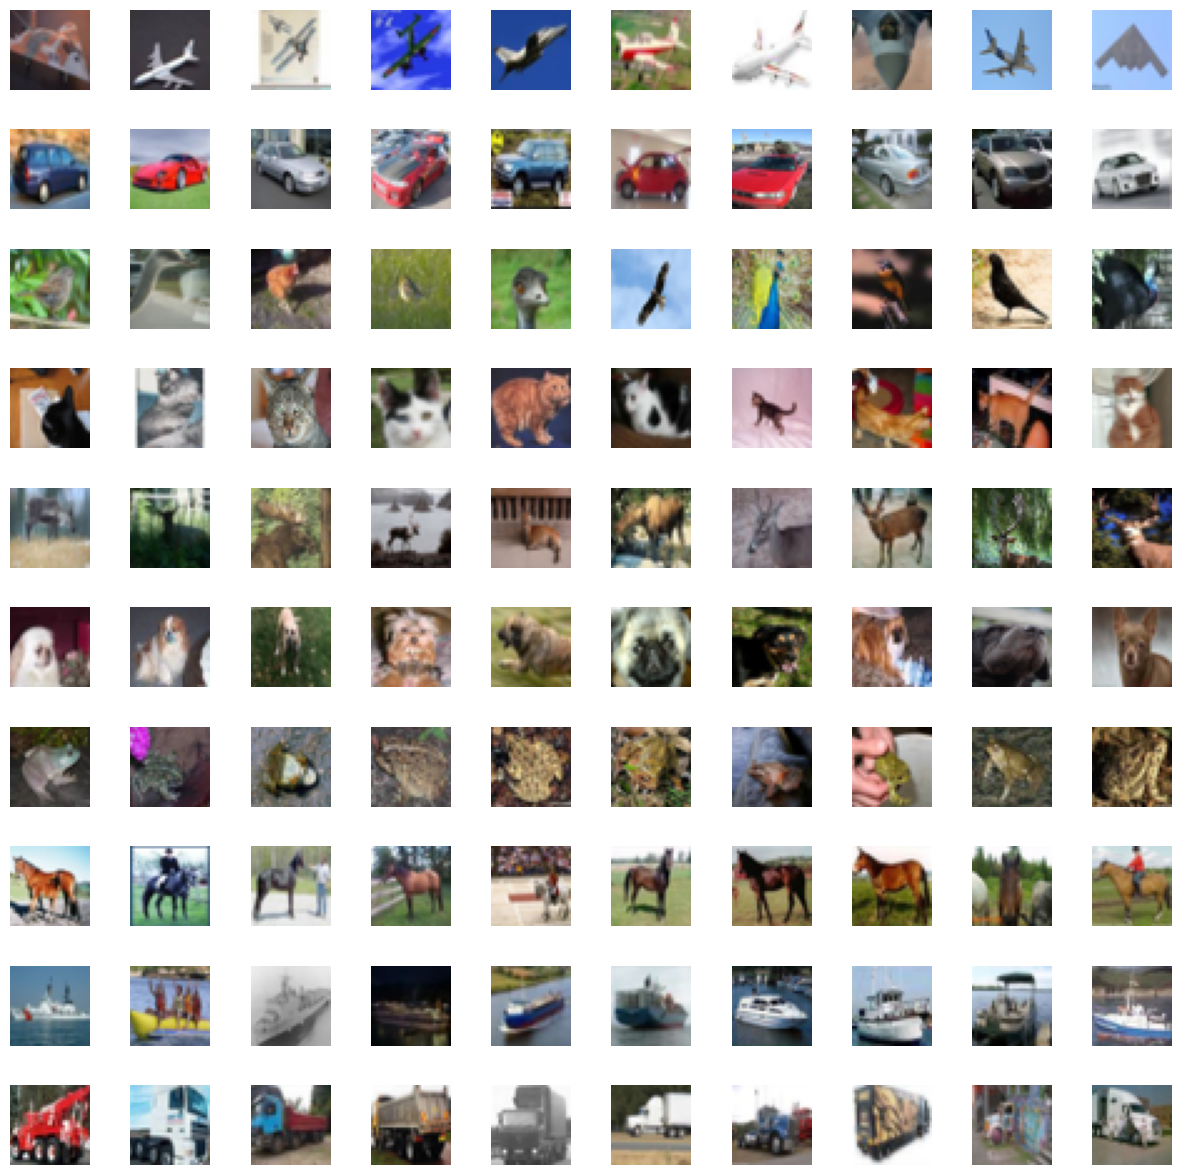

In [28]:
from matplotlib import image
from matplotlib import pyplot
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for class_idx in range(10):
    # Find all indices for the current class
    class_indices = np.where(y_train.flatten() == class_idx)[0]
    # Pick 10 random samples from this class
    random_indices = np.random.choice(class_indices, 10, replace=False)

    for i, img_idx in enumerate(random_indices):
        ax = axes[class_idx, i]
        ax.imshow(x_train[img_idx])
        ax.axis('off')


plt.show()



In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# One-hot encode labels
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
)
train_generator = datagen.flow(
    x_train, y_train_onehot,
    batch_size=32
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(x_test, y_test_onehot, batch_size=32)

In [33]:


from keras.backend import clear_session
clear_session()
from keras import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers.schedules import ExponentialDecay
from keras.regularizers import l2

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
model2 = Sequential([

    layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(512, (3,3),padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

model2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 72ms/step - accuracy: 0.4122 - loss: 1.9066 - val_accuracy: 0.5763 - val_loss: 1.3052 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.6055 - loss: 1.2056 - val_accuracy: 0.5408 - val_loss: 1.5499 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 69ms/step - accuracy: 0.6663 - loss: 1.0380 - val_accuracy: 0.6632 - val_loss: 1.0599 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.6953 - loss: 0.9583 - val_accuracy: 0.7127 - val_loss: 0.9157 - learning_rate: 0.0010
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.7165 - loss: 0.9005 - val_accuracy: 0.6765 - val_loss: 1.0240 - learning_rate: 0.0010
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.7357 - loss: 0.8482 - val_accuracy: 0.7399 - val_loss: 0.8521 - learning_rate: 0.0010
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step -

In [35]:
loss, acc = model2.evaluate(test_generator)
print(f"Test Accuracy: {acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8639 - loss: 0.4514
Test Accuracy: 0.863


In [37]:
model2.save("ic_cnn_model.keras")

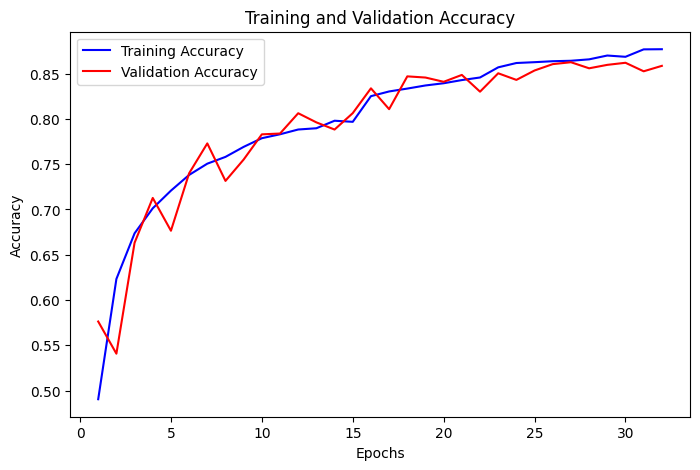

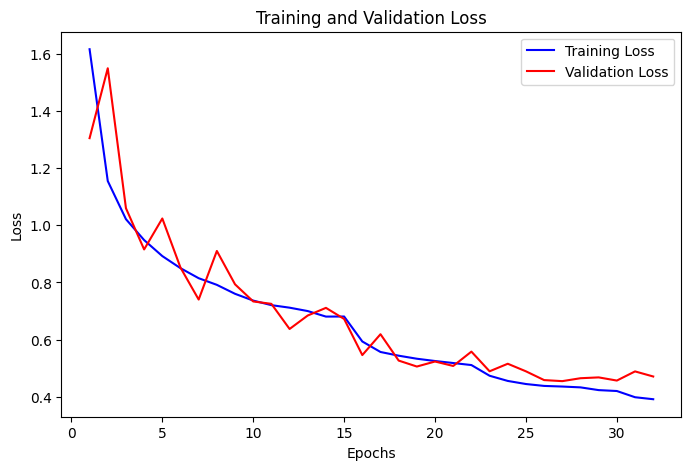

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()